In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import pandas as pd
import glob
from copy import deepcopy
from scipy.stats import *
from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
# self_defined modules
from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod
from read_var_obs import *

from calc_LRM_metric import *
from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
# from fitLRM_cy4 import *
from useful_func_cy import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *


# calc_LRMobs_metric, fitLRMobs(fitLRM_1, 2, 4)
# & Aploting_Sep11

In [2]:
from calc_LRMobs_metric import *
from fitLRMobs import *
from Aploting_Sep11 import *

In [88]:
valid_range1=[1992, 1, 15]
valid_range2=[2012, 12, 31]
valid_range3=[2013, 1, 15]
valid_range4=[2016, 12, 31]


(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(126, 45, 360)
Fill Value:  -999.0
(126, 45, 360)
Fill Value:  -999.0
(126, 45, 360)


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:148: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:148: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:149: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:149: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan


 ended cropping 
 ended cropping 


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:175: RuntimeWarning: Mean of empty slice
  annually_array[i,:,:] = nanmean(dict_annually_mean[variable_nas[v]][i*12:(i+1)*12, :,:], axis = 0)


End monthly data binned.
End annually data binned.
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2013 2014 2015 2016]
Fill Value:  -999.0
(48, 45, 360)
Fill Value:  -999.0
(48, 45, 360)
Fill Value:  -999.0
(48, 45, 360)
 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.
(252, 9, 72)
(252, 9, 72)
(252, 9, 72)
(252, 9, 72)
(252, 9, 72)
(252, 9, 72)
(126, 9, 72)
(126, 9, 72)
(126, 9, 72)
(126, 9, 72)
(126, 9, 72)
(126, 9, 72)
predictors metrix shape:  (4, 163296)
shape1:  (163296,)
shape2:  (1, 84350)
 Total # of regime 1
(4, 31104)
shape1:  (31104,)
shape2:  (1, 16243)
 Total # of regime 1
current # of regimes 0


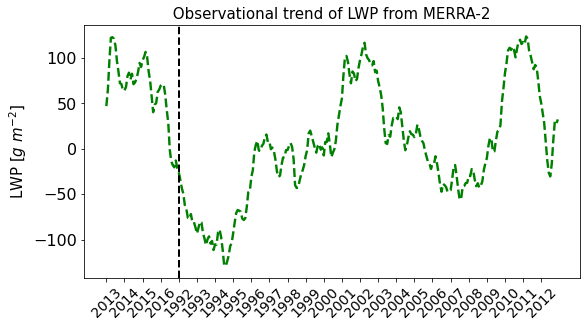

In [89]:
# -----------------

# 'valid_range1' and 'valid_range2' give the time stamps of starting and ending times of data for training,
# 'valid_range3' and 'valid_range4' give the time stamps of starting and ending times of data for predicting.
# 'THRESHOLD_sst' is the cut-off of 'Sea surface temperature' for partitioning the 'Hot'/'Cold' LRM regimes;
# 'THRESHOLD_sub' is the cut-off of '500 mb Vertical Velocity (Pressure)' for partitioning 'Up'/'Down' regimes.
# ..
# ------------------
# Southern Ocean 5 * 5 degree bin box
# Using to do area_mean
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9


# Function #1 loopping through variables space to find the cut-offs of LRM (Multi-Linear Regression Model).
dict_training, lats_Array, lons_Array, times_Array_training = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range1, valid_range2 = valid_range2)

dict_predict, lats_Array, lons_Array, times_Array_predict = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range3, valid_range2 = valid_range4)

# Loop_OBS_LRM(dict_training, dict_predict, s_range, x_range, y_range)

    
# Function #2 training LRM with using no cut-off, then use it to predict another historical period.
predict_result_1r = fitLRMobs_1(dict_training, dict_predict, s_range, y_range, x_range, lats_Array, lons_Array)
std_dev_LWP = predict_result_1r['std_LWP_training']
# plotting and correlation to the actual value of predict period's LWP:

# monthly, binned

LWP_obs_trends(predict_result_1r['LWP_actual_predict'], predict_result_1r['LWP_predi_predict'], predict_result_1r['LWP_actual_training'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

# print(pearsonr(area_mean(predict_result_1r['LWP_actual_predict']* std_dev_LWP, y_range, x_range), area_mean(predict_result_1r['LWP_predi_predict']* std_dev_LWP, y_range, x_range)))

In [86]:
# processing data:
datavar_obs = ['SST', 'p_e', 'LWP']

dict2_predi_fla_training = {}
dict2_predi = {}
dict2_predi_ano_training = {}  
dict2_predi_nor_training = {}

for d in range(len(datavar_obs)):
    dict2_predi_fla_training[datavar_obs[d]] = dict_training[datavar_obs[d]].flatten()
    # anomalies in the raw units:
    dict2_predi[datavar_obs[d]] = deepcopy(dict_training[datavar_obs[d]])
    print(dict2_predi[datavar_obs[d]].shape)
    
    dict2_predi_ano_training[datavar_obs[d]] = dict2_predi_fla_training[datavar_obs[d]] - np.nanmean(area_mean(dict2_predi[datavar_obs[d]], y_range, x_range))
    
    dict2_predi_nor_training[datavar_obs[d]] = dict2_predi_ano_training[datavar_obs[d]] / np.nanstd(dict2_predi_fla_training[datavar_obs[d]])  # divided by std
    
    dict2_predi_nor_training[datavar_obs[d]] = dict2_predi_nor_training[datavar_obs[d]].reshape((300, 9, 72))

(300, 9, 72)
(300, 9, 72)
(300, 9, 72)


In [83]:
def LWP_obs_trends3(data_Array_actual_training, data_Array_predict_training, time_Array_predict, time_Array_training, lats, lons, data_type = '2', running_mean_window = 2):
    # -----------------
    # 'data_Array' is a ndarray for LWP data (monthly or annually, unbinned or binned);
    # 'data_type' gives the type info;
    # 'lats' & 'lons' are the latitude and longitude array of the data;
    # 'time_Array' is an array in shape (N, 3)(N is length of the first dimension of data_Array, which are the (year, mon, day) infomation of the data
    # -----------------
    fig1, ax1  = plt.subplots(1, 1, figsize =(8.9, 4.65))  # (18.2, 13.2)
    # ax1 = plt.axes()
    
    parameters = {'axes.labelsize': 15, 'legend.fontsize': 14,
              'axes.titlesize': 15, 'xtick.labelsize': 14, 'ytick.labelsize': 16}
    
    plt.rcParams.update(parameters)
    path_Plotting = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Sep8_Observation_data/'


    output_time = np.arange(0, time_Array_training.shape[0], 1)
    df_actual = pd.DataFrame({'A': area_mean((data_Array_actual_training), lats, lons)})
    output_actual = df_actual.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()
    # df_predict = pd.DataFrame({'B': area_mean((data_Array_predict_training), lats, lons) *1000.})
    # output_predict = df_predict.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()

    plt.plot(output_time, output_actual, alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'green', zorder =1)
    # plt.plot(output_time, output_predict, label = 'CCFs Predi LWP: ' + r'$5*5^{o}$' + ' '+ str(running_mean_window) + ' yrs running mean', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'b', zorder =1)
    # ax1.axvline(time_Array_predict.shape[0], linestyle = '--', linewidth = 2.0, c = 'k')
    # print(time_Array_predict[0,0] )
    # print(np.append(np.arange(time_Array_predict[0, 0], time_Array_predict[0, 0] + time_Array_predict.shape[0]//12, 1) , np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1)))

    plt.xticks(output_time[0::12], np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1).astype(int), rotation = 45)
    # plt.xlabel(' Time ')
    plt.ylabel('LWP '+ r'$ [std \dot dev ]$')  # kg*m^{-2}
    plt.title(" Observational trend of LWP from MAC-LWP ")

    # plt.legend()
    # plt.show()
    plt.savefig(path_Plotting + 'Trends_obs_predict+train_3_LWP'+str(running_mean_window)+'yrsrunningvariation.jpg', bbox_inches = 'tight', dpi = 300)

In [60]:
def LWP_obs_trends4(data_Array_actual_predict, data_Array_predict_predict, data_Array_actual_training, data_Array_predict_training, time_Array_predict, time_Array_training, lats, lons, data_type = '2', running_mean_window = 2):
    # -----------------
    # 'data_Array' is a ndarray for LWP data (monthly or annually, unbinned or binned);
    # 'data_type' gives the type info;
    # 'lats' & 'lons' are the latitude and longitude array of the data;
    # 'time_Array' is an array in shape (N, 3)(N is length of the first dimension of data_Array, which are the (year, mon, day) infomation of the data
    # -----------------
    fig1, ax1  = plt.subplots(1, 1, figsize =(8.9, 4.65))  # (18.2, 13.2)
    # ax1 = plt.axes()
    
    parameters = {'axes.labelsize': 15, 'legend.fontsize': 14,
              'axes.titlesize': 15, 'xtick.labelsize': 14, 'ytick.labelsize': 16}
    
    plt.rcParams.update(parameters)
    path_Plotting = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Sep8_Observation_data/'
    
    if data_type == '1':  # input monthly --> output annually
        
        output_time = np.arange(0, (time_Array_training.shape[0] + time_Array_predict.shape[0])//12, 1)
        output_actual = area_mean(annually_mean(np.append(data_Array_actual_predict, data_Array_actual_training, axis = 0), time_Array, label = 'mon'), lats, lons)
        output_predict = area_mean(annually_mean(np.append(data_Array_predict_predict,data_Array_predict_training, axis = 0), time_Array, label = 'mon'), lats, lons)
        plt.plot(output_time, output_actual, label = 'OBS LWP: ' + '5*5 annually variation', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'green', zorder =1)
        plt.plot(output_time, output_predict, label = 'Predi OBS LWP: ' + '5*5 annually variation', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'b', zorder =1)
        print(time_Array_predict[0, 0])
        
        plt.xticks(output_time, (np.append(np.arange(time_Array_predict[0, 0], time_Array_predict[0, 0] + time_Array_predict.shape[0]//12, 1) , np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1))).astype(int), rotation = 45)
        plt.xlabel(' Time ')
        plt.ylabel('LWP '+r'$ [std_{LWP}\ anomalies]$')
        plt.title(" LWP over Times ")
    
        # plt.show()
        plt.savefig(path_Plotting + 'Trends_obs_predict+train_2_LWPyrvariation.jpg', bbox_inches = 'tight', dpi = 150)
    
    
    elif data_type == '2':  # input monthly --> output monthly
        
        output_time = np.arange(0, time_Array_training.shape[0] + time_Array_predict.shape[0], 1)
        output_actual = area_mean(np.append(data_Array_actual_predict, data_Array_actual_training, axis = 0), lats, lons)
        output_predict = area_mean(np.append(data_Array_predict_predict,data_Array_predict_training, axis = 0), lats, lons)
        
        plt.plot(output_time, output_actual, label = 'OBS LWP: ' + '5*5 monthly variation', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'green', zorder =1)
        plt.plot(output_time, output_predict, label = 'Predi OBS LWP: ' + '5*5 monthly variation', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'b', zorder =1)
        print(time_Array_predict[0, 0])
        ax1.axvline(time_Array_predict.shape[0], linestyle = '--', linewidth = 2.0, c = 'k')
        plt.xticks(output_time[0::12], (np.append(np.arange(time_Array_predict[0, 0], time_Array_predict[0, 0] + time_Array_predict.shape[0]//12, 1) , np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1))).astype(int), rotation = 45)
        plt.xlabel(' Time ')
        plt.ylabel('LWP '+r'$ [std_{LWP}\ anomalies]$')
        plt.title(" LWP over Times ")
    
        # plt.show()
        plt.savefig(path_Plotting + 'Trends_obs_predict+train_2_LWPmonthvariation.jpg', bbox_inches = 'tight', dpi = 150)
        
    
    elif data_type == '3':  # input monthly --> output running annually mean: e.g. 2yrs or 3yrs
        
        output_time = np.arange(0, time_Array_training.shape[0] + time_Array_predict.shape[0], 1)
        df_actual = pd.DataFrame({'A': area_mean(np.append(data_Array_actual_predict,data_Array_actual_training, axis = 0), lats, lons) *1000.})
        output_actual = df_actual.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()
        df_predict = pd.DataFrame({'B': area_mean(np.append(data_Array_predict_predict, data_Array_predict_training, axis = 0), lats, lons) *1000.})
        output_predict = df_predict.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()
        
        plt.plot(output_time, output_actual, label = 'OBS LWP: ' + r'$5*5^{o}$' + ' ' + str(running_mean_window) + ' yrs running mean', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'green', zorder =1)
        # plt.plot(output_time, output_predict, label = 'CCFs Predi LWP: ' + r'$5*5^{o}$' + ' '+ str(running_mean_window) + ' yrs running mean', alpha = 1.0, linewidth= 2.40, linestyle = '--', c = 'b', zorder =1)
        ax1.axvline(time_Array_predict.shape[0], linestyle = '--', linewidth = 2.0, c = 'k')
        # print(time_Array_predict[0,0] )
        # print(np.append(np.arange(time_Array_predict[0, 0], time_Array_predict[0, 0] + time_Array_predict.shape[0]//12, 1) , np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1)))
        
        plt.xticks(output_time[0::12], (np.append(np.arange(time_Array_predict[0, 0], time_Array_predict[0, 0] + time_Array_predict.shape[0]//12, 1) , np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1))).astype(int), rotation = 45)
        # plt.xlabel(' Time ')
        plt.ylabel('LWP '+r'$ [g\ m^{-2}]$')  # kg*m^{-2}
        plt.title(" Observational trend of SST from MERRA-2 ")
        
        # plt.legend()
        # plt.show()
        plt.savefig(path_Plotting + 'Trends_obs_predict+train_2_SST'+str(running_mean_window)+'yrsrunningvariation.jpg', bbox_inches = 'tight', dpi = 300)
    
    return None

(300, 9, 72)
(300, 9, 72)
(300, 9, 72)
(300, 9, 72)
(300, 9, 72)
(300, 9, 72)
(174, 9, 72)
(174, 9, 72)
(174, 9, 72)
(174, 9, 72)
(174, 9, 72)
(174, 9, 72)
predictors metrix shape:  (4, 194400)
shape1:  (194400,)
shape2:  (1, 100593)
 Total # of regime 1
(4, 77760)
shape1:  (77760,)
shape2:  (1, 40208)
 Total # of regime 1
current # of regimes 0


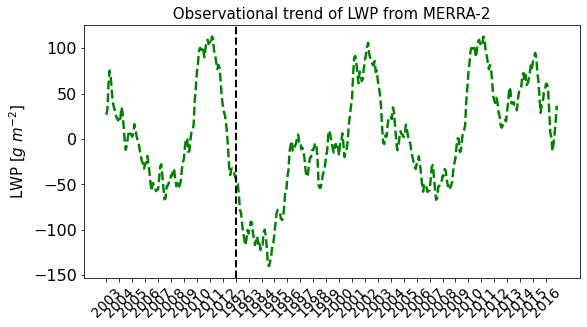

In [73]:
predict_result_1r = fitLRMobs_1(dict_training, dict_predict, s_range, y_range, x_range, lats_Array, lons_Array)
std_dev_LWP = predict_result_1r['std_LWP_training']
# plotting and correlation to the actual value of predict period's LWP:

# monthly, binned

LWP_obs_trends(predict_result_1r['LWP_actual_predict'], predict_result_1r['LWP_predi_predict'], predict_result_1r['LWP_actual_training'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

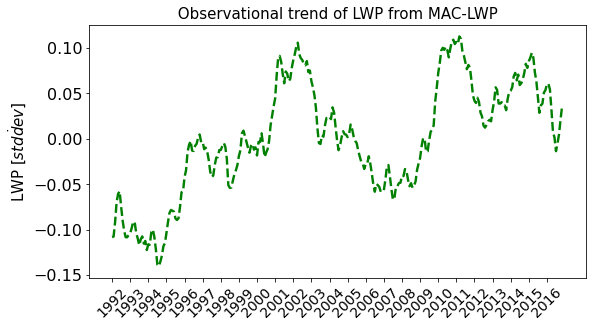

In [84]:
LWP_obs_trends3(dict2_predi_nor_training['LWP'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

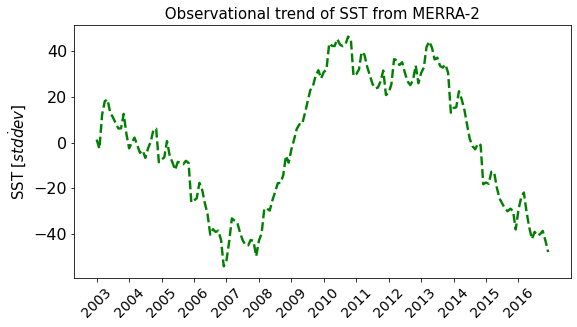

In [48]:
LWP_obs_trends3(dict2_predi_nor_training['SST'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

In [ ]:
LWP_obs_trends3(dict2_predi_nor_training['SST'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

In [3]:
# Function #3,4,5 training LRM with cut_off (TR_sst &/or TR_sub)

WD = '/glade/scratch/chuyan/obs_output/'
folder = glob.glob(WD + 'OBS__' + 'STAT_pi+abr_'+'22x_31y_Sep11th'+ '.npz')
print('cut-off folder', folder)

output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)

TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']

print("TR_min_abs(bias): " , TR_sst1, '  K ', TR_sub1 , ' Pa/s ')
print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')

predict_result_2r_updown = fitLRMobs_2_updown(dict_training, dict_predict, TR_sst2, TR_sub2, s_range, y_range, x_range, lats_Array, lons_Array)

predict_result_2r_hotcold = fitLRMobs_2_hotcold(dict_training, dict_predict, TR_sst2, TR_sub2, s_range, y_range, x_range, lats_Array, lons_Array)

predict_result_4r = fitLRMobs_4(dict_training, dict_predict, TR_sst2, TR_sub2, s_range, y_range, x_range, lats_Array, lons_Array)

# Plotting for the 'Liquid Water Path' trends in the historical period
LWP_obs_trends(predict_result_2r_updown['LWP_actual_predict'], predict_result_2r_updown['LWP_predi_predict'], predict_result_2r_updown['LWP_actual_training'], predict_result_2r_updown['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

LWP_obs_trends(predict_result_2r_hotcold['LWP_actual_predict'], predict_result_2r_hotcold['LWP_predi_predict'], predict_result_2r_hotcold['LWP_actual_training'], predict_result_2r_hotcold['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

LWP_obs_trends(predict_result_4r['LWP_actual_predict'], predict_result_4r['LWP_predi_predict'], predict_result_4r['LWP_actual_training'], predict_result_4r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)
print(pearsonr(area_mean(annually_mean(predict_result_4r['LWP_actual_predict'], times_Array_predict, label = 'mon'), y_range, x_range), area_mean(annually_mean(predict_result_4r['LWP_predi_predict'], times_Array_predict, label = 'mon'), y_range, x_range)))

cut-off folder ['/glade/scratch/chuyan/obs_output/OBS__STAT_pi+abr_22x_31y_Sep11th.npz']
TR_min_abs(bias):  284.5258187711201   K  -0.014617270429645265  Pa/s 
TR_large_pi_R_2:  283.9439510076129   K  0.004837945345928386  Pa/s 


NameError: name 'fitLRMobs_2_updown' is not defined

In [ ]:
# CCF trends in historical period:

LWP_obs_trends_2(dict_predict['p_e'], dict_predict['p_e'], times_Array_predict, y_range, x_range, data_type = '1', running_mean_window = 2)

LWP_obs_trends(dict_predict['SUB'], dict_predict['SUB'], dict_training['SUB'], dict_training['SUB'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

# loop_small_LRM 

In [ ]:
exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]   # current # 31 (no.19) + 20 = 51
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']

In [ ]:
deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'BCCCSMCM2MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', ', GFDLESM2G', 'GFDLESM2M']

# calc_LRM_metric
# fitLRM_cy1
# fitLRM_cy2

In [ ]:
# model_data = GFDLCM3
N_of_model = 22

WD = '/glade/scratch/chuyan/CMIP_output/'

folder = glob.glob(WD+ deck_nas2[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+'.npz')
# print(folder)
output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']

print("TR_min_abs(bias): " , TR_sst1, '  K ', TR_sub1 , ' Pa/s ')
print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')

calc_LRM_metrics(float(TR_sst2), float(TR_sub2), **deck2[N_of_model])
THRESHOLD_sst = TR_sst2
THRESHOLD_sub = TR_sub2

In [ ]:
# get variable data
if model_data['cmip'] == 'cmip6':

    inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

elif model_data['cmip'] == 'cmip5':

    inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
else:
    print('not cmip6 & cmip5 data.')

# ******************************* #
# Radiation Change
# coef_array_alpha_cre_pi, coef_array_albedo_pi, coef_array_alpha_cre_abr, coef_array_albedo_abr = calc_Radiation_LRM_1(inputVar_pi, inputVar_abr, TR_albedo = 0.25)
coef_array_alpha_cre_pi, coef_array_albedo_pi, coef_array_alpha_cre_abr, coef_array_albedo_abr = calc_Radiation_LRM_2(inputVar_pi, inputVar_abr)

# ******************************* #
#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = array(inputVar_abr['pres'])
times_abr = inputVar_abr['times'] *1.
times_pi = inputVar_pi['times'] *1.

lati0 = -40.
latsi0= min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
lati1 = -85.
latsi1= min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
print('lat index for 40.s; 85.s', latsi0, latsi1)

shape_latSO =  (latsi0+1) - latsi1
#print(shape_latSO)


#..abrupt-4xCO2 Variables: LWP, tas(gmt), SST, (MC), p-e; SW radiation metrics
LWP_abr = array(inputVar_abr['clwvi']) - array(inputVar_abr['clivi'])   #..units in kg m^-2

gmt_abr = array(inputVar_abr['tas'])

SST_abr = array(inputVar_abr['sfc_T'])

Precip_abr = array(inputVar_abr['P']) * (24.*60.*60.)   #.. Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
print('abr4x average Pr(mm/ day): ', nanmean(Precip_abr))   #.. IPSL/abr2.80..  CNRM ESM2 1/abr 2.69.. CESM2/abr 2.74..
lh_vaporization_abr = (2.501 - (2.361 * 10**-3) * (SST_abr - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
# Eva_abr2 = array(inputVar_abr['E']) * (24. * 60 * 60)
Eva_abr1 = array(inputVar_abr['E']) / lh_vaporization_abr * (24. * 60 * 60)  #.. Evaporation, mm day^-1
print('abr4x average Evapor(mm/ day): ', nanmean(Eva_abr1))         #.. IPSL/abr2.50..  CNRM ESM2 1/abr 2.43.. CESM2/abr 2.43..
MC_abr = Precip_abr - Eva_abr1   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1

Twp_abr = array(inputVar_abr['clwvi'])
Iwp_abr = array(inputVar_abr['clivi'])

# SW radiation metrics
Rsdt_abr = array(inputVar_abr['rsdt'])
Rsut_abr = array(inputVar_abr['rsut'])
Rsutcs_abr = array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:, latsi1:latsi0 +1,:]))
print("shape of data in 'abrupt-4XCO2' exp:", Eva_abr1.shape, 'abr4x mean-gmt(K): ', nanmean(gmt_abr))

# albedo, albedo_clear sky, albedo_cre: all-sky - clear-sky
Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr

if np.min(LWP_abr)<0:
    LWP_abr = Twp_abr
    print('clwvi mislabeled')

#..piControl Variables: LWP, tas(gmt), SST, (MC), p-e ; SW radiation metrics (rsdt, rsut, rsutcs)
LWP = array(inputVar_pi['clwvi']) - array(inputVar_pi['clivi'])   #..units in kg m^-2

gmt = array(inputVar_pi['tas'])
SST = array(inputVar_pi['sfc_T'])

Precip = array(inputVar_pi['P'])* (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
print('pi-C average Pr(mm/ day): ', nanmean(Precip))   #.. IPSL/piC 2.43..CNRM/piC 2.40.. CESM2/PIc 2.39
lh_vaporization = (2.501 - (2.361 * 10**-3) * (SST - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
Eva1 = array(inputVar_pi['E']) / lh_vaporization * (24. * 60 * 60)
# Eva2 = array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1

print('pi-C average Evapor(mm/day): ', nanmean(Eva1))   #.. IPSL/piC  2.21..CNRM/piC 2.20.. CESM2/PIc 2.17..
MC = Precip - Eva1   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1

Twp = array(inputVar_pi['clwvi'])
Iwp = array(inputVar_pi['clivi'])


# SW radiation metrics
Rsdt_pi = array(inputVar_pi['rsdt'])
Rsut_pi = array(inputVar_pi['rsut'])
Rsutcs_pi = array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:, latsi1:latsi0 +1,:]))
print("shape of data in 'piControl' data: ", Eva1.shape, 'pi-C mean-gmt(K): ', nanmean(gmt))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

if np.min(LWP)<0:
    LWP = Twp
    print('clwvi mislabeled')

#..abrupt-4xCO2
# Lower Tropospheric Stability (LTS):
k = 0.286

theta_700_abr = array(inputVar_abr['T_700']) * (100000./70000.)**k
theta_skin_abr = array(inputVar_abr['sfc_T']) * (100000./array(inputVar_abr['sfc_P']))**k 
LTS_m_abr = theta_700_abr - theta_skin_abr

#..Subtract the outliers in T_700 and LTS_m, 'nan' comes from missing T_700 data
LTS_e_abr = ma.masked_where(theta_700_abr >= 500, LTS_m_abr)

# Meteorology Subsidence at 500 hPa, units in Pa s^-1:
Subsidence_abr = array(inputVar_abr['sub'])

#.. piControl
# Lower Tropospheric Stability (LTS):
theta_700 = array(inputVar_pi['T_700']) * (100000./70000.)**k
theta_skin = array(inputVar_pi['sfc_T']) * (100000./array(inputVar_pi['sfc_P']))**k
LTS_m = theta_700 - theta_skin

#..Subtract the outliers in T_700 and LTS_m 
LTS_e = ma.masked_where(theta_700 >= 500, LTS_m)

#..Meteological Subsidence  at 500 hPa, units in Pa s^-1:
Subsidence = array(inputVar_pi['sub'])

# define Dictionary to store: CCFs(4), gmt, other variables :
dict0_PI_var = {'gmt': gmt, 'LWP': LWP, 'TWP': Twp, 'IWP': Iwp, 'SST': SST, 'p_e': MC, 'LTS': LTS_e, 'SUB': Subsidence, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'gmt': gmt_abr, 'LWP': LWP_abr, 'TWP': Twp_abr, 'IWP': Iwp_abr, 'SST': SST_abr, 'p_e': MC_abr, 'LTS': LTS_e_abr ,'SUB': Subsidence_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}



In [ ]:
# get the Annual-mean, Southern-Ocean region arrays

datavar_nas = ['LWP', 'TWP', 'IWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre', 'SST', 'p_e', 'LTS', 'SUB']   #..13 varisables except gmt (lon dimension diff)

dict1_PI_yr = {}
dict1_abr_yr = {}
shape_yr_pi = shape_time_pi//12
shape_yr_abr = shape_time_abr//12

layover_yr_abr = zeros((len(datavar_nas), shape_yr_abr, shape_latSO, shape_lon))
layover_yr_pi = zeros((len(datavar_nas), shape_yr_pi, shape_latSO, shape_lon))

layover_yr_abr_gmt = zeros((shape_yr_abr, shape_lat, shape_lon))
layover_yr_pi_gmt = zeros((shape_yr_pi, shape_lat, shape_lon))


for a in range(len(datavar_nas)):

    # a_array = dict0_abr_var[datavar_nas[a]]

    for i in range(shape_time_abr//12):
        layover_yr_abr[a, i,:,:] = nanmean(dict0_abr_var[datavar_nas[a]][i*12:(i+1)*12, latsi1:latsi0 +1,:], axis=0)

    dict1_abr_yr[datavar_nas[a]+'_yr'] = layover_yr_abr[a,:]


    # b_array = dict0_PI_var[datavar_nas[a]]
    for j in range(shape_time_pi//12):
        layover_yr_pi[a, j,:,:] = nanmean(dict0_PI_var[datavar_nas[a]][j*12:(j+1)*12, latsi1:latsi0 +1,:], axis=0)

    dict1_PI_yr[datavar_nas[a]+'_yr'] = layover_yr_pi[a,:]
    print(datavar_nas[a])

#print(dict1_PI_yr['LWP_yr'])

# gmt
for i in range(shape_time_abr//12):

    layover_yr_abr_gmt[i,:,:] = nanmean(dict0_abr_var['gmt'][i*12:(i+1)*12, :,:], axis=0)
dict1_abr_yr['gmt_yr'] = layover_yr_abr_gmt

for j in range(shape_time_pi//12):
    layover_yr_pi_gmt[j,:,:] = nanmean(dict0_PI_var['gmt'][j*12:(j+1)*12, :,:], axis=0)
dict1_PI_yr['gmt_yr'] = layover_yr_pi_gmt

# print(dict1_PI_yr['gmt_yr'])
dict0_PI_var['dict1_yr'] = dict1_PI_yr
dict0_abr_var['dict1_yr'] = dict1_abr_yr


# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

# Annually variables in bin box:

lat_array = lats[latsi1:latsi0+1] *1.
lon_array = lons *1.
lat_array1 = lats *1.

dict1_PI_var = {}   #.. add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata
dict1_abr_var = {}   #.. add at Dec.30th, at 2021. Purpose: shrink the output savez data dictionary: rawdata
dict1_yr_bin_PI = {}
dict1_yr_bin_abr = {}

for b in range(len(datavar_nas)):

    dict1_yr_bin_abr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_abr_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)
    dict1_yr_bin_PI[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_PI_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)

# print(dict1_yr_bin_abr['PRW_yr_bin'].shape)
# print(dict1_yr_bin_abr['gmt_yr_bin'])  #..(150, 36, 73)
# print(dict1_yr_bin_PI['SUB_yr_bin'].shape)  #..(100, 10, 73)
dict1_yr_bin_abr['gmt_yr_bin'] = binned_cyGlobal5(dict1_abr_yr['gmt_yr'], lat_array1, lon_array)
dict1_yr_bin_PI['gmt_yr_bin'] = binned_cyGlobal5(dict1_PI_yr['gmt_yr'], lat_array1, lon_array)
print('gmt_yr_bin')

dict1_abr_var['dict1_yr_bin_abr'] = dict1_yr_bin_abr
dict1_PI_var['dict1_yr_bin_PI'] = dict1_yr_bin_PI

# Monthly variables (same as above):
dict1_mon_bin_PI = {}
dict1_mon_bin_abr = {}

for c in range(len(datavar_nas)):
    dict1_mon_bin_abr[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_abr_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)
    dict1_mon_bin_PI[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_PI_var[datavar_nas[c]][0:, latsi1:latsi0+1,:], lat_array, lon_array)

dict1_mon_bin_abr['gmt_mon_bin'] = binned_cyGlobal5(dict0_abr_var['gmt'][0:,:,:], lat_array1, lon_array)
dict1_mon_bin_PI['gmt_mon_bin'] = binned_cyGlobal5(dict0_PI_var['gmt'][0:,:,:], lat_array1, lon_array)
print("Every month monthly data")

dict1_abr_var['dict1_mon_bin_abr'] = dict1_mon_bin_abr
dict1_PI_var['dict1_mon_bin_PI'] = dict1_mon_bin_PI


# input the shapes of year and month of pi&abr exper into the raw data dictionaries:
dict1_abr_var['shape_yr'] = shape_yr_abr
dict1_PI_var['shape_yr'] = shape_yr_pi

dict1_abr_var['shape_mon'] = shape_time_abr
dict1_PI_var['shape_mon'] = shape_time_pi

# Output a dict for processing function in 'calc_LRM_metrics', stored the data dicts for PI and abr, with the model name_dict
C_dict = {'dict1_PI_var': dict1_PI_var, 'dict1_abr_var': dict1_abr_var, 'model_data': model_data, 'coef_array_alpha_cre_pi': coef_array_alpha_cre_pi, 'coef_array_albedo_pi': coef_array_albedo_pi, 'coef_array_alpha_cre_abr': coef_array_alpha_cre_abr, 'coef_array_albedo_abr': coef_array_albedo_abr}  #..revised on June 23th, 2022.
D_dict = deepcopy(C_dict)   # 'notice for the difference between shallow copy (object.copy()) and deep copy(copy.deepcopy(object))'
B_dict = deepcopy(C_dict)

###..Put data into 'fitLRM' FUNCTION to get predicted LWP splitted by 'Tr_sst'/'Tr_sub' infos_models:
WD = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'



fitLRM_cy1

In [ ]:
# C_dict = B_dict
TR_sst = THRESHOLD_sst   ###.. threshold skin T
TR_sub = THRESHOLD_sub   ###.. threshold of 500 mb Subsidence
s_range = s_range
y_range = y_range
x_range = x_range
lats = lats
lons = lons

In [ ]:
# 'C_dict' is the raw data dict, 'TR_sst' is the pre-defined skin_Temperature Threshold to distinguish two Multi-Linear Regression Models

# 's_range , 'y_range', 'x_range' used to do area mean for repeat gmt ARRAY

dict0_abr_var = C_dict['dict1_abr_var']
dict0_PI_var  = C_dict['dict1_PI_var']
#print(dict0_PI_var['times'])

model = C_dict['model_data']   #.. type in dict

datavar_nas = ['LWP', 'TWP', 'IWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'SST', 'p_e', 'LTS', 'SUB']   #..12 varisables except gmt (lon dimension  diff)

# load annually-mean bin data.
dict1_yr_bin_PI = dict0_PI_var['dict1_yr_bin_PI']
dict1_yr_bin_abr = dict0_abr_var['dict1_yr_bin_abr']
#print(dict1_yr_bin_PI['LWP_yr_bin'].shape)

# load monthly bin data.
dict1_mon_bin_PI = dict0_PI_var['dict1_mon_bin_PI']
dict1_mon_bin_abr = dict0_abr_var['dict1_mon_bin_abr']

# data array in which shapes?
shape_yr_PI = dict1_yr_bin_PI['LWP_yr_bin'].shape
shape_yr_abr = dict1_yr_bin_abr['LWP_yr_bin'].shape

shape_yr_PI_gmt = dict1_yr_bin_PI['gmt_yr_bin'].shape
shape_yr_abr_gmt = dict1_yr_bin_abr['gmt_yr_bin'].shape

shape_mon_PI = dict1_mon_bin_PI['LWP_mon_bin'].shape
shape_mon_abr = dict1_mon_bin_abr['LWP_mon_bin'].shape

shape_mon_PI_gmt = dict1_mon_bin_PI['gmt_mon_bin'].shape
shape_mon_abr_gmt = dict1_mon_bin_abr['gmt_mon_bin'].shape


#.. archieve the 'shape' infos: 3-D
C_dict['shape_yr_PI_3'] = shape_yr_PI
C_dict['shape_yr_abr_3'] = shape_yr_abr
C_dict['shape_yr_PI_gmt_3'] = shape_yr_PI_gmt
C_dict['shape_yr_abr_gmt_3'] = shape_yr_abr_gmt

C_dict['shape_mon_PI_3'] = shape_mon_PI
C_dict['shape_mon_abr_3'] = shape_mon_abr
C_dict['shape_mon_PI_gmt_3'] = shape_mon_PI_gmt
C_dict['shape_mon_abr_gmt_3'] = shape_mon_abr_gmt

# flatten the data array for 'training' lrm  coefficience

dict2_predi_fla_PI = {}
dict2_predi_fla_abr = {}

dict2_predi_ano_PI = {}  # need a climatological arrays of variables
dict2_predi_ano_abr = {}  # need a climatological arrays of variables

dict2_predi_nor_PI = {}  # standardized anomalies of variables
dict2_predi_nor_abr = {}

dict2_predi = {}

#.. Ravel binned array /Standardized data ARRAY :
for d in range(len(datavar_nas)):

    dict2_predi_fla_PI[datavar_nas[d]] = dict1_mon_bin_PI[datavar_nas[d]+'_mon_bin'].flatten()
    dict2_predi_fla_abr[datavar_nas[d]] = dict1_mon_bin_abr[datavar_nas[d]+'_mon_bin'].flatten()

    # anomalies in the raw units:
    # 'dict2_predi' as a dict for reference-period (mean state) data
    dict2_predi[datavar_nas[d]] = deepcopy(dict1_mon_bin_PI[datavar_nas[d]+'_mon_bin'])

    dict2_predi_ano_PI[datavar_nas[d]] = dict2_predi_fla_PI[datavar_nas[d]] - nanmean(area_mean(dict2_predi[datavar_nas[d]], y_range, x_range))
    dict2_predi_ano_abr[datavar_nas[d]] = dict2_predi_fla_abr[datavar_nas[d]] - nanmean(area_mean(dict2_predi[datavar_nas[d]], y_range,x_range))

    # normalized stardard deviation in unit of './std':
    dict2_predi_nor_PI[datavar_nas[d]] = dict2_predi_ano_PI[datavar_nas[d]] / nanstd(dict2_predi_fla_PI[datavar_nas[d]])  # divided by monthly standard variance
    dict2_predi_nor_abr[datavar_nas[d]] = dict2_predi_ano_abr[datavar_nas[d]] / nanstd(dict2_predi_fla_PI[datavar_nas[d]])

#..Use area_mean method, 'np.repeat' and 'np.tile' to reproduce gmt area-mean Array as the same shape as other flattened variables
GMT_pi_mon = area_mean(dict1_mon_bin_PI['gmt_mon_bin'], s_range,  x_range)   #.. MONTHLY time series of global area_mean surface air temperature
GMT_abr_mon = area_mean(dict1_mon_bin_abr['gmt_mon_bin'], s_range, x_range)   #.. MONTHLY time series of global area_mean surface air temperature

# Use the southernOCEAN value as the gmt variable
dict2_predi_fla_PI['gmt'] = GMT_pi_mon
dict2_predi_fla_abr['gmt'] = GMT_abr_mon
dict2_predi['gmt'] = deepcopy(dict2_predi_fla_PI['gmt'])
shape_whole_period = asarray(dict2_predi['gmt'].shape[0])

dict2_predi_ano_abr['gmt'] = dict2_predi_fla_abr['gmt'] - np.nanmean(dict2_predi['gmt'])  # shape in (t, lat, lon).flatten()
dict2_predi_ano_PI['gmt'] = dict2_predi_fla_PI['gmt'] - np.nanmean(dict2_predi['gmt'])  # shape in (t, lat, lon).flatten()

dict2_predi_nor_abr['gmt'] = dict2_predi_ano_abr['gmt'] / np.nanstd(dict2_predi_fla_PI['gmt'])
dict2_predi_nor_PI['gmt'] = dict2_predi_ano_PI['gmt'] / np.nanstd(dict2_predi_fla_PI['gmt'])

# shape of flattened array:
metric_training = deepcopy(dict2_predi_nor_PI)
metric_predict = deepcopy(dict2_predi_nor_abr)

shape_fla_PI = dict2_predi_fla_PI['LWP'].shape
shape_fla_abr = dict2_predi_fla_abr['LWP'].shape

# save into rawdata_dict:
C_dict['metric_training'] = dict2_predi_nor_PI
C_dict['metric_predict'] = dict2_predi_nor_abr
C_dict['GMT_training'] = GMT_pi_mon
C_dict['GMT_predict'] = GMT_abr_mon

C_dict['Mean_training'] = nanmean(area_mean(dict2_predi['LWP'], y_range, x_range))
C_dict['Stdev_training'] = nanstd(dict2_predi_fla_PI['LWP'])
print(C_dict['Mean_training'], C_dict['Stdev_training'])

# shape of flattened array:
metric_training = deepcopy(dict2_predi_nor_PI)
metric_predict = deepcopy(dict2_predi_nor_abr)

shape_fla_PI = dict2_predi_fla_PI['LWP'].shape
shape_fla_abr = dict2_predi_fla_abr['LWP'].shape


# The thresholds: TR_SST, TR_SUB:
'''
TR_sst_ano = TR_sst - np.nanmean(area_mean(dict2_predi['SST'], y_range, x_range))
TR_sub_ano = TR_sub - np.nanmean(area_mean(dict2_predi['SUB'], y_range, x_range))

TR_sst_nor = TR_sst_ano / np.nanstd(dict2_predi['SST'].flatten())
TR_sub_nor = TR_sub_ano / np.nanstd(dict2_predi['SUB'].flatten())
print('Threhold_anomalies: ', TR_sst_ano, TR_sub_ano)
print('Threhold_normalized: ', TR_sst_nor, TR_sub_nor)
'''

#.. Training Module (2 lrm, with Up & Down)
#.. piControl

predict_dict_PI, ind7_PI, ind8_PI, ind9_PI, ind10_PI, coef_array, shape_fla_training = rdlrm_4_training(metric_training, TR_sst, TR_sub, predictant='LWP', r = 2)
# predict_dict_PI_iwp, ind7_PI_iwp, ind8_PI_iwp, ind9_PI_iwp, ind10_PI_iwp, coef_array_iwp, shape_fla_training_iwp = rdlrm_4_training(metric_training, TR_sst_nor, TR_sub_nor, predictant='IWP', r = 2)
'''
predict_dict_PI_albedo, _, _, _, _, coef_array_albedo = rdlrm_4_training(metric_training, TR_sst_nor, TR_sub_nor, predictant='albedo', predictor=['LWP', 'albedo_cs'], r = 2)[0:6]
predict_dict_PI_rsut, _, _, _, _, coef_array_rsut = rdlrm_4_training(metric_training, TR_sst_nor, TR_sub_nor, predictant='rsut', predictor=['LWP', 'rsutcs'], r = 2)[0:6]
'''
# Added on May 13th, 2022: for second step using LWP to predict the albedo
'''
dict2_predi_fla_PI['LWP_lrm'] = deepcopy(predict_dict_PI['value'])
dict2_predi_ano_PI['LWP_lrm'] = dict2_predi_fla_PI['LWP_lrm'] - nanmean(area_mean( dict2_predi_fla_PI['LWP_lrm'].reshape(shape_mon_PI), y_range, x_range))
dict2_predi_nor_PI['LWP_lrm'] = dict2_predi_ano_PI['LWP_lrm'] / nanstd(dict2_predi_fla_PI['LWP_lrm'])
predict_dict_PI_albedo_lL, _, _, _, _, coef_array_albedo_lL = rdlrm_4_training(dict2_predi_fla_PI, TR_sst, TR_sub, predictant='albedo', predictor=['LWP_lrm', 'albedo_cs'], r  = 2)[0:6]
predict_dict_PI_rsut_lL, _, _, _, _, coef_array_rsut_lL = rdlrm_4_training(dict2_predi_fla_PI, TR_sst, TR_sub, predictant='rsut', predictor=['LWP_lrm', 'rsutcs'], r = 2)[0:6]
'''
# Save into the rawdata dict
C_dict['Coef_dict'] = coef_array
C_dict['Predict_dict_PI']  = predict_dict_PI
C_dict['ind_Up_PI'] = ind7_PI  # C_dict['ind_Cold_Up_PI'] = ind7_PI
C_dict['ind_Down_PI'] = ind8_PI  # C_dict['ind_Hot_Up_PI'] = ind8_PI
# C_dict['Coef_dict_IWP']= coef_array_iwp
# C_dict['Predict_dict_PI_IWP']  = predict_dict_PI_iwp

# 'YB' is the predicted value of LWP in 'piControl' experiment
YB = predict_dict_PI['value']
# YB_iwp = predict_dict_PI_iwp['value']

# Save 'YB', resampled into the shape of 'LWP_yr_bin':
C_dict['LWP_predi_bin_PI'] = asarray(YB).reshape(shape_mon_PI)
# C_dict['IWP_predi_bin_PI'] = asarray(YB_iwp).reshape(shape_mon_PI)

# Test performance
stats_dict_PI = Test_performance_2(metric_training['LWP'], YB, ind7_PI, ind8_PI)   #  Test_performance_4(dict2_predi_fla_PI['LWP'], YB, ind7_PI, ind8_PI, ind9_PI, ind10_PI)
# stats_dict_PI_iwp = Test_performance_2(metric_training['IWP'], YB_iwp, ind7_PI_iwp, ind8_PI_iwp)   # Test_performance_4(dict2_predi_fla_PI['IWP'], YB_iwp, ind7_PI_iwp, ind8_PI_iwp, ind9_PI_iwp, ind10_PI_iwp)


#.. predict Module (2LRM-Up & Down)
#.. abrupt 4xCO2

predict_dict_abr, ind7_abr, ind8_abr, ind9_abr, ind10_abr, shape_fla_testing = rdlrm_4_predict(metric_predict, coef_array, TR_sst, TR_sub, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)
# predict_dict_abr_iwp, ind7_abr_iwp, ind8_abr_iwp, ind9_abr_iwp, ind10_abr_iwp, shape_fla_testing_iwp = rdlrm_4_predict(metric_predict coef_array_iwp, TR_sst_nor, TR_sub_nor, predictant = 'IWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)

# Added on May 14th, 2022: for second step using LWP to predict the albedo
'''
# dict2_predi_fla_abr['LWP_lrm'] = deepcopy(predict_dict_abr['value'])
# dict2_predi_ano_abr['LWP_lrm'] = dict2_predi_fla_abr['LWP_lrm'] - nanmean(area_mean( dict2_predi_fla_PI['LWP_lrm'].reshape(shape_mon_abr), y_range, x_range))
# dict2_predi_nor_abr['LWP_lrm'] = (dict2_predi_fla_abr['LWP_lrm'] / nanstd(dict2_predi_fla_abr['LWP_lrm'])
# predict_dict_abr_albedo_lL = rdlrm_4_predict(dict2_predi_fla_abr, coef_array_albedo, TR_sst, TR_sub, predictant='albedo', predictor=['LWP_lrm', 'albedo_cs'], r = 2)[0]
# predict_dict_abr_rsut_lL = rdlrm_4_predict(dict2_predi_fla_abr, coef_array_rsut, TR_sst, TR_sub, predictant='rsut', predictor=['LWP_lrm', 'rsutcs'], r = 2)[0]
'''
# Save into the rawdata dict
C_dict['Predict_dict_abr'] = predict_dict_abr
C_dict['ind_Up_abr'] = ind7_abr  # C_dict['ind_Cold_Up_abr'] = ind7_abr
C_dict['ind_Down_abr'] = ind8_abr  # C_dict['ind_Hot_Up_abr'] = ind8_abr
# C_dict['Predict_dict_abr_IWP'] = predict_dict_abr_iwp

# 'YB_abr' is the predicted value of LWP in 'abrupt-4xCO2' experiment
YB_abr = predict_dict_abr['value']
# YB_abr_iwp = predict_dict_abr_iwp['value']

# Save 'YB_abr', reshapled into the shape of 'LWP_yr_bin_abr':
C_dict['LWP_predi_bin_abr'] = asarray(YB_abr).reshape(shape_mon_abr)
# C_dict['IWP_predi_bin_abr'] = asarray(YB_abr_iwp).reshape(shape_mon_abr)

# Test performance for abrupt4xCO2 
stats_dict_abr = Test_performance_2(metric_predict['LWP'], YB_abr, ind7_abr, ind8_abr)  # Test_performance_4(dict2_predi_fla_abr['LWP'], YB_abr, ind7_abr, ind8_abr, ind9_abr, ind10_abr)
# stats_dict_abr_iwp = Test_performance_2(metric_predict['IWP'], YB_abr_iwp, ind7_abr_iwp, ind8_abr_iwp)  # Test_performance_4(dict2_predi_fla_abr['IWP'], YB_abr_iwp, ind7_abr_iwp, ind8_abr_iwp, ind9_abr_iwp, ind10_abr_iwp)

#.. save preditc metrics into rawdata_dict
C_dict['stats_dict_PI'] = stats_dict_PI
# C_dict['stats_dict_PI_iwp'] = stats_dict_PI_iwp

C_dict['stats_dict_abr'] = stats_dict_abr
# C_dict['stats_dict_abr_iwp'] = stats_dict_abr_iwp

# return C_dict


In [ ]:
Mean_training = C_dict['Mean_training'], 
Stdev_training = C_dict['Stdev_training']
shape_yr_pi = shape_yr_pi
shape_yr_abr = shape_yr_abr
rawdata_dict = C_dict

In [ ]:
### 's_range , 'y_range', 'x_range' used to do area mean for repeat gmt ARRAY

# retriving datas from big dict...
dict0_abr_var = rawdata_dict['dict1_abr_var']
dict0_PI_var = rawdata_dict['dict1_PI_var']
shape_yr_PI_3 = rawdata_dict['shape_yr_PI_3']
shape_yr_abr_3 = rawdata_dict['shape_yr_abr_3']
shape_mon_PI_3 = rawdata_dict['shape_mon_PI_3']
shape_mon_abr_3 = rawdata_dict['shape_mon_abr_3']

model = rawdata_dict['model_data']   #.. type in dict

datarepo_nas = ['LWP']  # 'IWP', albedo', 'albedo_cs', 'rsut', 'rsutcs'

# load annually-mean bin data:
dict1_yr_bin_PI = deepcopy(dict0_PI_var['dict1_yr_bin_PI'])
dict1_yr_bin_abr = deepcopy(dict0_abr_var['dict1_yr_bin_abr'])

# load monthly bin data:
dict1_mon_bin_PI = deepcopy(dict0_PI_var['dict1_mon_bin_PI'])
dict1_mon_bin_abr = deepcopy(dict0_abr_var['dict1_mon_bin_abr'])

# load anomalies (or normalized) monthly bin data:
dict_metric_actual_PI = deepcopy(rawdata_dict['metric_training'])
dict_metric_actual_abr = deepcopy(rawdata_dict['metric_predict'])

# load normalized predicted bin data:
LWP_metric_predi_PI = deepcopy(rawdata_dict['LWP_predi_bin_PI'])
LWP_metric_predi_abr = deepcopy(rawdata_dict['LWP_predi_bin_abr'])

# calculate (convert) the predicted data back to raw unit:
LWP_raw_predi_PI = (LWP_metric_predi_PI * Stdev_training) + Mean_training  # + Mean_training
LWP_raw_predi_abr = (LWP_metric_predi_abr * Stdev_training) + Mean_training  # + Mean_training

## Calc annually-mean, area-mean variables on 'abrupt4xCO2' and 'piControl' exps:
# GCM actual variable
areamean_dict_PI = {}
areamean_dict_abr = {}

for e in range(len(datarepo_nas)):

    #  "monthly" convert to "annually":
    areamean_dict_PI[datarepo_nas[e]+ '_yr_bin'] = get_annually_metric(dict_metric_actual_PI['LWP'].reshape(shape_mon_PI_3), shape_mon_PI_3[0], shape_mon_PI_3[1], shape_mon_PI_3[2]) 
    areamean_dict_abr[datarepo_nas[e]+ '_yr_bin'] = get_annually_metric(dict_metric_actual_abr['LWP'].reshape(shape_mon_abr_3), shape_mon_abr_3[0], shape_mon_abr_3[1], shape_mon_abr_3[2])
    
    # "yr_bin" area_mean to 'shape_yr_':
    areamean_dict_PI[datarepo_nas[e]+ '_area_yr'] = area_mean(areamean_dict_PI[datarepo_nas[e]+ '_yr_bin'], y_range, x_range)
    areamean_dict_abr[datarepo_nas[e]+ '_area_yr'] = area_mean(areamean_dict_abr[datarepo_nas[e]+ '_yr_bin'], y_range, x_range)

areamean_dict_PI['gmt_area_yr'] = area_mean(dict1_yr_bin_PI['gmt_yr_bin'], s_range, x_range)
areamean_dict_abr['gmt_area_yr'] = area_mean(dict1_yr_bin_abr['gmt_yr_bin'], s_range, x_range)


# LRM predict variable
areamean_dict_predi =  {}
datapredi_nas = ['LWP']  # 'IWP', 'albedo', 'rsut', 'albedo_lL', 'rsut_lL'

for f in range(len(datapredi_nas)):
    areamean_dict_predi[datapredi_nas[f]+'_predi_yr_bin_pi'] = get_annually_metric(rawdata_dict[datapredi_nas[f]+'_predi_bin_PI'], shape_mon_PI_3[0], shape_mon_PI_3[1], shape_mon_PI_3[2])
    areamean_dict_predi[datapredi_nas[f]+'_predi_yr_bin_abr'] = get_annually_metric(rawdata_dict[datapredi_nas[f]+'_predi_bin_abr'], shape_mon_abr_3[0], shape_mon_abr_3[1], shape_mon_abr_3[2])

# "yr_bin" area_mean to 'shape_yr_':
for g in range(len(datapredi_nas)):

    areamean_dict_predi[datapredi_nas[g]+'_area_yr_pi'] = area_mean(areamean_dict_predi[datapredi_nas[g]+'_predi_yr_bin_pi'], y_range, x_range)
    areamean_dict_predi[datapredi_nas[g]+'_area_yr_abr'] = area_mean(areamean_dict_predi[datapredi_nas[g]+'_predi_yr_bin_abr'], y_range, x_range)

# Store the annually report & predicted metrics
rawdata_dict['areamean_dict_predi'] = areamean_dict_predi
rawdata_dict['areamean_dict_abr'] = areamean_dict_abr
rawdata_dict['areamean_dict_PI'] = areamean_dict_PI

# calc d_DeltaLWP /d_DeltaGMT |(abrupt-4xCO2 - avg(piControl)) add June 27th.
output_2report_pi = area_mean(get_annually_metric(dict1_mon_bin_PI['LWP_mon_bin'],shape_mon_PI_3[0],shape_mon_PI_3[1],shape_mon_PI_3[2]), y_range, x_range)[:]
output_2report_abr = area_mean(get_annually_metric(dict1_mon_bin_abr['LWP_mon_bin'],shape_mon_abr_3[0],shape_mon_abr_3[1],shape_mon_abr_3[2]), y_range, x_range)[0:150]

output_2predict_pi = area_mean(get_annually_metric(LWP_raw_predi_PI, shape_mon_PI_3[0],shape_mon_PI_3[1],shape_mon_PI_3[2]), y_range, x_range)[:]
output_2predict_abr = area_mean(get_annually_metric(LWP_raw_predi_abr, shape_mon_abr_3[0],shape_mon_abr_3[1],shape_mon_abr_3[2]), y_range, x_range)[0:150]

output_yrs = arange(99 + 150)

output_dabrmeanpi_report2 = output_2report_abr[0:150] - nanmean(output_2report_pi[0:99])
output_dabrmeanpi_predict2 = areamean_dict_predi['LWP_area_yr_abr'][0:150] - nanmean(areamean_dict_predi['LWP_area_yr_pi'][0:99])
output_dabrmeanpi_GMT2 = areamean_dict_abr['gmt_area_yr'][0:150] - mean(areamean_dict_PI['gmt_area_yr'])

# regressed delta_LWP over delta_GMT, using 'statsmodels' ols functions
data = pd.DataFrame({'x': output_dabrmeanpi_GMT2, 'y1':output_dabrmeanpi_report2, 'y2':output_dabrmeanpi_predict2})

model_report = ols("y1 ~ x", data).fit()
model_predicted = ols("y2 ~ x", data).fit()

print(" d_LWP/d_GMT model report summary: ", model_report._results.params[1], model_report._results.params[0])
print(" d_LWP/d_GMT model predict summary: ", model_predicted._results.params[1], model_predicted._results.params[0])

#..save into rawdata_dict
Dx_DtG = asarray([[model_report._results.params[1], model_report._results.params[0]], [model_predicted._results.params[1], model_predicted._results.params[0]]])
rawdata_dict['dX_dTg'] = Dx_DtG


# Generate continous annually-mean array are convenient for plotting LWP changes:
#..Years from 'piControl' to 'abrupt4xCO2' experiment, which are choosed years
Yrs = arange(shape_yr_pi + areamean_dict_abr['gmt_area_yr'].shape[0])
rawdata_dict['Yrs'] = Yrs

# global-mean surface air temperature, from 'piControl' to 'abrupt4xCO2' experiment:

GMT = full((shape_yr_pi + areamean_dict_abr['gmt_area_yr'].shape[0]),  0.0)
GMT[0:shape_yr_pi] = areamean_dict_PI['gmt_area_yr']
GMT[shape_yr_pi:] = areamean_dict_abr['gmt_area_yr']
rawdata_dict['GMT'] = GMT
# LRM predict annually mean, area-mean values, from 'piControl' to 'abrupt4xCO2' experiment
predict_metrics_annually = {}
report_metrics_annually = {}

for h in range(len(datapredi_nas)):
    predict_metrics_annually[datapredi_nas[h]] = full((shape_yr_pi + areamean_dict_predi[datapredi_nas[h] + '_area_yr_abr'].shape[0]), 0.0)
    predict_metrics_annually[datapredi_nas[h]][0:shape_yr_pi] = areamean_dict_predi[datapredi_nas[h] + '_area_yr_pi'][0:shape_yr_pi]
    predict_metrics_annually[datapredi_nas[h]][shape_yr_pi:(shape_yr_pi + areamean_dict_predi[datapredi_nas[h] + '_area_yr_abr'].shape[0])] = areamean_dict_predi[datapredi_nas[h]+'_area_yr_abr']

# GCM actual annually mean, area-mean values, from 'piControl' to 'abrupt4xCO2' experiment

for i in range(len(datarepo_nas)):
    report_metrics_annually[datarepo_nas[i]] = full((shape_yr_pi + areamean_dict_abr[datarepo_nas[i] + '_area_yr'].shape[0]), 0.0)  
    report_metrics_annually[datarepo_nas[i]][0:shape_yr_pi] = areamean_dict_PI[datarepo_nas[i] + '_area_yr'][0:shape_yr_pi]
    report_metrics_annually[datarepo_nas[i]][shape_yr_pi:(shape_yr_pi+areamean_dict_abr[datarepo_nas[i] + '_area_yr'].shape[0])] = areamean_dict_abr[datarepo_nas[i]+'_area_yr']

print("report LWP: ", report_metrics_annually['LWP'])
print("predicted LWP: ", predict_metrics_annually['LWP'])

In [ ]:

LWP_raw_actual_PI = (dict_metric_actual_PI['LWP'] * Stdev_training) + Mean_training  # + Mean_training
LWP_raw_actual_abr = (dict_metric_actual_abr['LWP']* Stdev_training) + Mean_training 

print(LWP_raw_actual_abr)

In [ ]:
modn = 'GFDLCM3'
type_analysis = 'forecasting'

# get cmip6 data:
name_j = 0
while name_j < len(deck_nas):

    if modn == deck_nas[name_j]:
        print("No. of models: ", name_j)
        if (deck[name_j]['cmip']=='cmip6') & (type_analysis == 'forecasting'):
            inputVar_pi, inputVar_abr = get_LWPCMIP6(**deck[name_j])
        elif (deck[name_j]['cmip']=='cmip5') & (type_analysis == 'forecasting'):
            inputVar_pi, inputVar_abr = get_LWPCMIP5(**deck[name_j])
        else:
            print('No existing data of this model in chuyan scratch space.')
        break

    name_j += 1

# begin process data:
#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)


#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons        = inputVar_pi['lon']
lats        = inputVar_pi['lat'][:]

levels      = array(inputVar_abr['pres'])
times_abr   = inputVar_abr['times']
times_pi    = inputVar_pi['times']

lati0 = -40.
latsi0= min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
lati1 = -85.
latsi1= min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
print('lat index for 40.s; 85.s', latsi0, latsi1)


shape_latSO = (latsi0 - latsi1) + 1 
#print(shape_latSO)


#..abrupt4xCO2 Variables: LWP, tas(gmt), SST, p-e, LTS, subsidence
LWP_abr  = array(inputVar_abr['clwvi']) - array(inputVar_abr['clivi'])   #..units in kg m^-2

gmt_abr  = array(inputVar_abr['tas'])
SST_abr  = array(inputVar_abr['sfc_T'])

Precip_abr = array(inputVar_abr['P']) * (24.*60.*60.)   #.. Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1

lh_vaporization_abr = (2.501 - (2.361 * 10**-3) * (SST_abr - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
# Eva_abr2 = array(inputVar_abr['E']) * (24. * 60 * 60)
Eva_abr1 = array(inputVar_abr['E']) / lh_vaporization_abr * (24. * 60 * 60)  #.. Evaporation, mm day^-1

MC_abr = Precip_abr - Eva_abr1   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1

Twp_abr  = array(inputVar_abr['clwvi'])
Iwp_abr  = array(inputVar_abr['clivi'])

if np.min(LWP_abr)<-1e-5:
    LWP_abr = Twp_abr
    print('clwvi mislabeled')
print('Abr simple global-mean-gmt(K): ', nanmean(gmt_abr))

#..pi-Control Variables: LWP, tas(gmt), SST, p-e, LTS, subsidence
LWP  = array(inputVar_pi['clwvi']) - array(inputVar_pi['clivi'])  #..units in kg m^-2

gmt  = array(inputVar_pi['tas'])
SST  = array(inputVar_pi['sfc_T'])

Precip = array(inputVar_pi['P'])* (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1

lh_vaporization = (2.501 - (2.361 * 10**-3) * (SST - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
Eva1 = array(inputVar_pi['E']) / lh_vaporization * (24. * 60 * 60)
# Eva2 = array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1

MC = Precip - Eva1   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1

Twp  = array(inputVar_pi['clwvi'])
Iwp  = array(inputVar_pi['clivi'])

print('pi-C simple global mean-gmt(K): ', nanmean(gmt))
if np.min(LWP)<-1e-5:
    LWP = Twp
    print('clwvi mislabeled')

#..abrupt4xCO2
# Lower Tropospheric Stability:
k  = 0.286
theta_700_abr = array(inputVar_abr['T_700']) * (100000./70000.)** k
theta_skin_abr = array(inputVar_abr['sfc_T']) * (100000./ array(inputVar_abr['sfc_P'])) **k
LTS_m_abr = theta_700_abr - theta_skin_abr

#..Subtract the outliers in T_700 and LTS_m, 'nan' comes from missing T_700 data
LTS_e_abr = ma.masked_where(theta_700_abr >= 500, LTS_m_abr)


# Meteorology Subsidence at 500 hPa, units in Pa s^-1:
Subsidence_abr = array(inputVar_abr['sub'])


#..pi-Control 
# Lower Tropospheric Stability:
theta_700  = array(inputVar_pi['T_700']) * (100000./70000.)** k
theta_skin = array(inputVar_pi['sfc_T']) * (100000./ array(inputVar_pi['sfc_P'])) **k
LTS_m = theta_700 - theta_skin

#..Subtract the outliers in T_700 and LTS_m 
LTS_e = ma.masked_where(theta_700 >= 500, LTS_m)


#..Meteological Subsidence at 500 hPa, units in Pa s^-1:
Subsidence = array(inputVar_pi['sub'])


# define Dictionary to store: CCFs(4), gmt, other variables:
dict0_PI_var = {'gmt': gmt, 'LWP': LWP, 'TWP': Twp, 'IWP': Iwp, 'SST': SST, 'p_e': MC, 'LTS': LTS_e, 'SUB': Subsidence
                 ,'lat':lats, 'lon':lons, 'times': times_pi, 'pres':levels}

dict0_abr_var = {'gmt': gmt_abr, 'LWP': LWP_abr, 'TWP': Twp_abr, 'IWP': Iwp_abr, 'SST': SST_abr, 'p_e': MC_abr, 'LTS': LTS_e_abr 
                 ,'SUB': Subsidence_abr, 'lat':lats, 'lon':lons, 'times': times_abr, 'pres':levels}



# get the Annual-mean, Southern-Ocean region arrays

datavar_nas = ['LWP', 'TWP', 'IWP', 'SST', 'p_e', 'LTS', 'SUB']   #..7 varisables except gmt (lon dimension diff)

dict1_PI_yr  = {}
dict1_abr_yr = {}

shape_yr_pi  = shape_time_pi//12
shape_yr_abr =  shape_time_abr//12


layover_yr_abr = zeros((len(datavar_nas), shape_yr_abr, shape_latSO, shape_lon))
layover_yr_pi = zeros((len(datavar_nas), shape_yr_pi, shape_latSO, shape_lon))

layover_yr_abr_gmt = zeros((shape_yr_abr, shape_lat, shape_lon))
layover_yr_pi_gmt = zeros((shape_yr_pi, shape_lat, shape_lon))


for a in range(len(datavar_nas)):

    for i in range(shape_time_abr//12):
        layover_yr_abr[a, i,:,:] =  nanmean(dict0_abr_var[datavar_nas[a]][i*12:(i+1)*12, latsi1:latsi0+1,:], axis=0)

    dict1_abr_yr[datavar_nas[a]+'_yr'] =  layover_yr_abr[a,:]

    for j in range(shape_time_pi//12):
        layover_yr_pi[a, j,:,:]  = nanmean(dict0_PI_var[datavar_nas[a]][j*12:(j+1)*12,  latsi1:latsi0+1,:], axis=0)

    dict1_PI_yr[datavar_nas[a]+'_yr'] =  layover_yr_pi[a,:]

    print(datavar_nas[a], " finish calculating annually-mean array")   



for i in range(shape_time_abr//12):

    layover_yr_abr_gmt[i,:,:]  =  nanmean(dict0_abr_var['gmt'][i*12:(i+1)*12, :,:], axis=0)
dict1_abr_yr['gmt_yr']  =   layover_yr_abr_gmt


for j in range(shape_time_pi//12):
    layover_yr_pi_gmt[j,:,:]  =   nanmean(dict0_PI_var['gmt'][j*12:(j+1)*12, :,:], axis=0)
dict1_PI_yr['gmt_yr']  =   layover_yr_pi_gmt

print('gmt', " finsih calc annuallt mean gmt")



# Calculate 5*5 bin array for variables (LWP, CCFs) in Southern Ocean Region:

#..set area-mean range and define function
x_range  = arange(-180., 180., 5.) #..logitude sequences edge: number: 72
s_range  = arange(-90., 90, 5.)+ 2.5 #..global-region latitude edge: (36)
y_range  = arange(-85, -40., 5.) +2.5 #..southern-ocaen latitude edge: 9


# Annually variables in bin box: 
lat_array  = lats[latsi1:latsi0+1]
lon_array  = lons
lat_array1 =  lats
#..big storage dict
dict1_PI_var   = {}
dict1_abr_var  =  {}
dict1_yr_bin_PI  = {}
dict1_yr_bin_abr = {}


for b in range(len(datavar_nas)):

    dict1_yr_bin_abr[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_abr_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)
    dict1_yr_bin_PI[datavar_nas[b]+'_yr_bin'] = binned_cySouthOcean5(dict1_PI_yr[datavar_nas[b]+'_yr'], lat_array, lon_array)
    print(datavar_nas[b], " finished calculating annually-mean bin array") 

dict1_yr_bin_abr['gmt_yr_bin'] = binned_cyGlobal5(dict1_abr_yr['gmt_yr'], lat_array1, lon_array)
dict1_yr_bin_PI['gmt_yr_bin'] = binned_cyGlobal5(dict1_PI_yr['gmt_yr'], lat_array1, lon_array)

print('gmt_yr_bin', " finish calc annually-mean binned gmt")

dict1_abr_var['dict1_yr_bin_abr'] = dict1_yr_bin_abr
dict1_PI_var['dict1_yr_bin_PI'] = dict1_yr_bin_PI



# Monthly variables (same as above):
dict1_mon_bin_PI  = {}
dict1_mon_bin_abr = {}

for c in range(len(datavar_nas)):

    dict1_mon_bin_abr[datavar_nas[c]+'_mon_bin'] =  binned_cySouthOcean5(dict0_abr_var[datavar_nas[c]][:, latsi1:latsi0+1,:], lat_array, lon_array)
    dict1_mon_bin_PI[datavar_nas[c]+'_mon_bin'] = binned_cySouthOcean5(dict0_PI_var[datavar_nas[c]][:, latsi1:latsi0+1,:], lat_array, lon_array)
    print(datavar_nas[c], " finish calculating monthly-mean bin array")

dict1_mon_bin_abr['gmt_mon_bin'] = binned_cyGlobal5(dict0_abr_var['gmt'], lat_array1, lon_array)
dict1_mon_bin_PI['gmt_mon_bin'] = binned_cyGlobal5(dict0_PI_var['gmt'], lat_array1, lon_array)

print('gmt_mon_bin', " finish calc monthly-mean binned gmt")

dict1_abr_var['dict1_mon_bin_abr'] = dict1_mon_bin_abr
dict1_PI_var['dict1_mon_bin_PI'] = dict1_mon_bin_PI


# input the shapes of year and month of pi&abr exper into the raw data dictionaries:
dict1_abr_var['shape_yr'] = shape_yr_abr
dict1_PI_var['shape_yr'] = shape_yr_pi
dict1_abr_var['shape_mon'] = shape_time_abr
dict1_PI_var['shape_mon'] = shape_time_pi



# Output a dict for processing function in 'calc_LRM_metrics', stored the data dicts for PI and abr, with the model name_dict
# C_dict =  {'dict0_PI_var':dict1_PI_var, 'dict0_abr_var':dict1_abr_var, 'model_data':model_data}    #..revised in Dec.30th, at 2021,, note the name.


# Second step processing data

# load annually-mean bin data
dict1_yr_bin_PI  = dict1_PI_var['dict1_yr_bin_PI']
dict1_yr_bin_abr  = dict1_abr_var['dict1_yr_bin_abr']


# load monthly bin data
dict1_mon_bin_PI  = dict1_PI_var['dict1_mon_bin_PI']
dict1_mon_bin_abr  = dict1_abr_var['dict1_mon_bin_abr']

# data array in which shapes?
shape_yr_PI_3 = dict1_yr_bin_PI['LWP_yr_bin'].shape
shape_yr_abr_3 = dict1_yr_bin_abr['LWP_yr_bin'].shape

shape_yr_PI_gmt = dict1_yr_bin_PI['gmt_yr_bin'].shape
shape_yr_abr_gmt = dict1_yr_bin_abr['gmt_yr_bin'].shape

shape_mon_PI_3 = dict1_mon_bin_PI['LWP_mon_bin'].shape
shape_mon_abr_3 = dict1_mon_bin_abr['LWP_mon_bin'].shape

shape_mon_PI_gmt = dict1_mon_bin_PI['gmt_mon_bin'].shape
shape_mon_abr_gmt = dict1_mon_bin_abr['gmt_mon_bin'].shape

# flatten the data array for 'training' lrm  coefficience

dict2_predi_fla_PI = {}
dict2_predi_fla_abr = {}

dict2_predi_ano_PI = {}  # need a climatological arrays of variables
dict2_predi_ano_abr = {}  # need a climatological arrays of variables

dict2_predi_nor_PI = {}  # standardized anomalies of variables
dict2_predi_nor_abr = {}

dict2_predi = {}

#..Ravel binned array /Standardized data ARRAY :
for d in range(len(datavar_nas)):

    dict2_predi_fla_PI[datavar_nas[d]] = dict1_mon_bin_PI[datavar_nas[d]+'_mon_bin'].flatten()
    dict2_predi_fla_abr[datavar_nas[d]] = dict1_mon_bin_abr[datavar_nas[d]+'_mon_bin'].flatten()

    # anomalies in the raw units:
    # 'dict2_predi' as a dict for reference-period (mean state) data
    dict2_predi[datavar_nas[d]] = deepcopy(dict1_mon_bin_PI[datavar_nas[d]+'_mon_bin'])

    dict2_predi_ano_PI[datavar_nas[d]] = dict2_predi_fla_PI[datavar_nas[d]] - nanmean(area_mean(dict2_predi[datavar_nas[d]], y_range, x_range))
    dict2_predi_ano_abr[datavar_nas[d]] = dict2_predi_fla_abr[datavar_nas[d]] - nanmean(area_mean(dict2_predi[datavar_nas[d]], y_range,x_range))

    # normalized stardard deviation in unit of './std':
    dict2_predi_nor_PI[datavar_nas[d]] = dict2_predi_ano_PI[datavar_nas[d]] / nanstd(dict2_predi_fla_PI[datavar_nas[d]])  # divided by monthly standard variance
    dict2_predi_nor_abr[datavar_nas[d]] = dict2_predi_ano_abr[datavar_nas[d]] / nanstd(dict2_predi_fla_PI[datavar_nas[d]])

#.. global-mean surface air temperature
# shape of 'GMT' is the length of time (t)
dict2_predi_fla_PI['gmt'] = area_mean(dict1_mon_bin_PI['gmt_mon_bin'], s_range, x_range)
dict2_predi_fla_abr['gmt'] = area_mean(dict1_mon_bin_abr['gmt_mon_bin'], s_range, x_range)

dict2_predi['gmt'] = deepcopy(dict2_predi_fla_PI['gmt'])
shape_whole_period = asarray(dict2_predi['gmt'].shape[0])

dict2_predi_ano_abr['gmt'] = dict2_predi_fla_abr['gmt'] - np.nanmean(dict2_predi['gmt'])  # shape in (t, lat, lon).flatten()
dict2_predi_ano_PI['gmt'] = dict2_predi_fla_PI['gmt'] - np.nanmean(dict2_predi['gmt'])  # shape in (t, lat, lon).flatten()

dict2_predi_nor_abr['gmt'] = dict2_predi_ano_abr['gmt'] / np.nanstd(dict2_predi_fla_PI['gmt'])
dict2_predi_nor_PI['gmt'] = dict2_predi_ano_PI['gmt'] / np.nanstd(dict2_predi_fla_PI['gmt'])

# shape of flattened array:
metric_training = deepcopy(dict2_predi_ano_PI)
metric_predict = deepcopy(dict2_predi_ano_abr)

shape_fla_PI = dict2_predi_fla_PI['LWP'].shape
shape_fla_abr = dict2_predi_fla_abr['LWP'].shape

# For pluging in different sets of cut-off(TR_sst & TR_sub) into LRM(s):
# split cut-off: TR_sst and TR_sub for N1 and N2 slices in sort of self-defined (Mon)variable ranges

YY_ay_gcm = metric_training['SST']
XX_ay_gcm = metric_training['SUB']

y_gcm = linspace(nanpercentile(YY_ay_gcm, 2), nanpercentile(YY_ay_gcm, 99), 31)   #..supposed to be changed, 31
x_gcm = linspace(nanpercentile(XX_ay_gcm, 5), nanpercentile(XX_ay_gcm, 95), 22)   #.., 22

print("slice SUB bound:  ", x_gcm)
print("slice SST bound:  ", y_gcm)


# Testing Plot OBS: Out-of-Sample Test on using CCFs to predict LWP: 

In [37]:
#.. current model #: 18 + 12 (except: '19')
path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Oct24_revise_add_YSSAR/'

In [3]:
# training
valid_range1=[2009, 1, 15]
valid_range2=[2016, 12, 31]   # 8 years
# Predicting
valid_range3=[1997, 1, 15]
valid_range4=[2008, 12, 31]   # 12 years

# 'valid_range1' and 'valid_range2' give the time stamps of starting and ending times of data for training,
# 'valid_range3' and 'valid_range4' give the time stamps of starting and ending times of data for predicting.
# 'THRESHOLD_sst' is the cut-off of 'Sea surface temperature' for partitioning the 'Hot'/'Cold' LRM regimes;
# 'THRESHOLD_sub' is the cut-off of '500 mb Vertical Velocity (Pressure)' for partitioning 'Up'/'Down' regimes.
# ..
# ------------------
# Southern Ocean 5 * 5 degree bin box
# Using to do area_mean
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9


# Function #1 loopping through variables space to find the cut-offs of LRM (Multi-Linear Regression Model).
dict_training, lats_Array, lons_Array, times_Array_training = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range1, valid_range2 = valid_range2)

dict_predict, lats_Array, lons_Array, times_Array_predict = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range3, valid_range2 = valid_range4)

predict_result_1r = fitLRMobs_1(dict_training, dict_predict, s_range, y_range, x_range, lats_Array, lons_Array)


(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2009 2010 2011 2012 2013 2014 2015 2016]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(96, 45, 360)
Fill Value:  -999.0
(96, 45, 360)
Fill Value:  -999.0
(96, 45, 360)


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:148: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:148: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:149: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/calc_LRMobs_metric.py:149: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan


 ended cropping 
 ended cropping 


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/useful_func_cy.py:175: RuntimeWarning: Mean of empty slice
  annually_array[i,:,:] = nanmean(dict_annually_mean[variable_nas[v]][i*12:(i+1)*12, :,:], axis = 0)


End monthly data binned.
End annually data binned.
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008]
Fill Value:  -999.0
(78, 45, 360)
Fill Value:  -999.0
(78, 45, 360)
Fill Value:  -999.0
(78, 45, 360)
 ended cropping 
 ended cropping 
End monthly data binned.
End annually data binned.
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
(96, 9, 72)
predictors metrix shape:  (4, 62208)
shape1:  (62208,)
shape2:  (1, 32293)
 Total # of regime 1
(4, 93312)
shape1:  (93312,)
shape2:  (1, 48239)
 Total # of regime 1
current # of regimes 0


[array([ 0.60369656,  0.79859947, -0.0084096 ,  0.14246616])
 0.0052891909234975935]


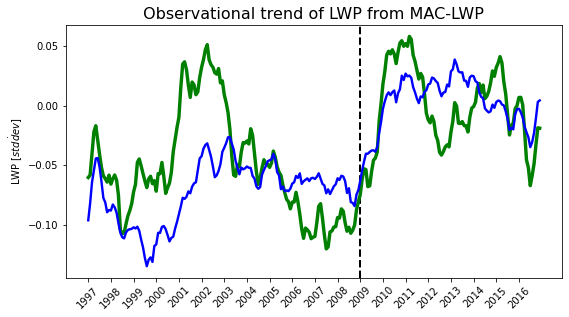

In [4]:
# monthly, binned

LWP_obs_trends(predict_result_1r['LWP_actual_predict'], predict_result_1r['LWP_predi_predict'], predict_result_1r['LWP_actual_training'], predict_result_1r['LWP_predi_training'], times_Array_predict, times_Array_training, y_range, x_range, data_type = '3', running_mean_window = 2)

print(predict_result_1r['coef_dict'])

In [5]:
print(predict_result_1r['predict_Array']['SST'])

[       nan        nan        nan ... 1.57832852        nan 1.7114965 ]


(2,)


Text(0.5, 1.0, '(b) Southern Ocean CCFs contribution')

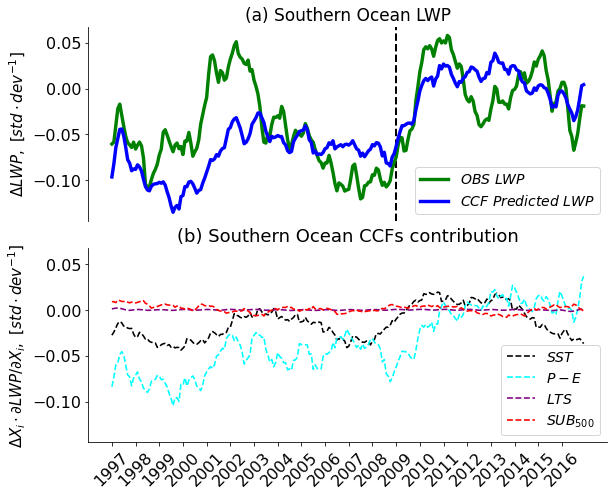

In [42]:
time_Array_training = times_Array_training
time_Array_predict = times_Array_predict

lats = y_range
lons = x_range
data_Array_actual_predict = predict_result_1r['LWP_actual_predict']
data_Array_actual_training = predict_result_1r['LWP_actual_training']
data_Array_predict_predict = predict_result_1r['LWP_predi_predict']
data_Array_predict_training = predict_result_1r['LWP_predi_training']
running_mean_window = 2


parameters = {'axes.labelsize': 15, 'legend.fontsize': 14,
         'axes.titlesize': 18,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)

coef_dict = predict_result_1r['coef_dict']
# print(coef_dict.shape)
df_CCF1 = pd.DataFrame({'SST': area_mean(np.append(predict_result_1r['predict_Array']['SST'].reshape(dict_predict['LWP'].shape), predict_result_1r['training_Array']['SST'].reshape(dict_training['LWP'].shape), axis = 0), lats, lons)})  # *1000.
df_CCF2 = pd.DataFrame({'p_e': area_mean(np.append(predict_result_1r['predict_Array']['p_e'].reshape(dict_predict['LWP'].shape), predict_result_1r['training_Array']['p_e'].reshape(dict_training['LWP'].shape), axis = 0), lats, lons)})  # *1000.
df_CCF3 = pd.DataFrame({'LTS': area_mean(np.append(predict_result_1r['predict_Array']['LTS'].reshape(dict_predict['LWP'].shape), predict_result_1r['training_Array']['LTS'].reshape(dict_training['LWP'].shape), axis = 0), lats, lons)})  # *1000.
df_CCF4 = pd.DataFrame({'SUB': area_mean(np.append(predict_result_1r['predict_Array']['SUB'].reshape(dict_predict['LWP'].shape), predict_result_1r['training_Array']['SUB'].reshape(dict_training['LWP'].shape), axis = 0), lats, lons)})  # *1000.
output_CCF1 = df_CCF1.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()
output_CCF2 = df_CCF2.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()
output_CCF3 = df_CCF3.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()
output_CCF4 = df_CCF4.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()

output_time = np.arange(0, time_Array_training.shape[0] + time_Array_predict.shape[0], 1)
df_actual = pd.DataFrame({'A': area_mean(np.append(data_Array_actual_predict, data_Array_actual_training, axis = 0), lats, lons)})  # *1000.
output_actual = df_actual.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()

df_predict = pd.DataFrame({'B': area_mean(np.append(data_Array_predict_predict, data_Array_predict_training, axis = 0), lats, lons) })  #*1000.
output_predict = df_predict.rolling((12* running_mean_window + 1), min_periods = 1, center = True).mean()

fig = plt.figure( figsize = (9.3, 7.65))
gs = fig.add_gridspec(2, hspace = 0.137)
axs = gs.subplots(sharex=True, sharey=True)

# Hide the right and top spines:
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)

# Only show ticks on the left and bottom spines
axs[1].yaxis.set_ticks_position('left')
axs[1].xaxis.set_ticks_position('bottom')
axs[0].xaxis.set_ticks_position('none')

axs[0].plot(output_time, output_actual, label = r'$OBS\ LWP$', alpha = 1.0, linewidth= 3.40, linestyle = '-', c = 'green', zorder = 98)
axs[0].plot(output_time, output_predict, label = r'$CCF\ Predicted\ LWP$', alpha = 1.0, linewidth= 3.40, linestyle = '-', c = 'b', zorder = 98)
axs[0].axvline(time_Array_predict.shape[0], linestyle = '--', linewidth = 2.0, c = 'k')

axs[1].plot(output_time, coef_dict[0][0] * output_CCF1, label = r'$SST$', alpha = 1.0, linewidth= 1.60, c = 'k', linestyle = '--')
axs[1].plot(output_time, coef_dict[0][1] * output_CCF2, label = r'$P-E$', alpha = 1.0, linewidth= 1.60, c = 'cyan', linestyle = '--')
axs[1].plot(output_time, coef_dict[0][2] * output_CCF3, label = r'$LTS$', alpha = 1.0, linewidth= 1.60, c = 'purple', linestyle = '--')
axs[1].plot(output_time, coef_dict[0][3] * output_CCF4, label = r'$SUB_{500}$', alpha = 1.0, linewidth= 1.60, c = 'red', linestyle = '--')
# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

axs[0].legend()
axs[1].legend()
axs[1].set_xticks(output_time[0::12])
axs[1].set_xticklabels((np.append(np.arange(time_Array_predict[0, 0], time_Array_predict[0, 0] + time_Array_predict.shape[0]//12, 1), np.arange(time_Array_training[0, 0], time_Array_training[0, 0] + time_Array_training.shape[0]//12, 1))).astype(int), rotation = 45)
# axs[0].set_xlabel(' Time ')
axs[0].set_ylabel(r"$\Delta LWP,\ $" + r"$ [std \cdot dev^{-1}]$")  # kg*m^{-2} 
axs[1].set_ylabel(r"$\Delta X_{i} \cdot \partial LWP/ \partial X_{i},\ $" + r"$ [std \cdot dev^{-1}]$")  # kg*m^{-2}
axs[0].set_title( "(a) Southern Ocean LWP", fontsize = 17)
axs[1].set_title( "(b) Southern Ocean CCFs contribution", fontsize = 18)
# fig.suptitle(" Observational trend of LWP from MAC-LWP ")

# plt.legend()
# plt.show()
# plt.savefig(path6 + 'Fig3.jpg', bbox_inches = 'tight', dpi = 425)
